In [2]:
import pandas as pd
from pyECLAT import ECLAT

import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,fpgrowth
from mlxtend.frequent_patterns import association_rules
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import time

In [3]:
df = pd.read_excel("data.xlsx")
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(522064, 7)

In [5]:
df.dtypes

BillNo                object
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                float64
CustomerID           float64
Country               object
dtype: object

In [6]:
df.describe()

,Quantity,Date,Price,CustomerID
count,522064.000000,522064,522064.000000,388023.000000
mean,10.090435,2011-07-04 12:51:20.777107456,3.826801,15316.931710
min,-9600.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:15:00,1.250000,13950.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15265.000000
75%,10.000000,2011-10-19 14:12:00,4.130000,16837.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,161.110525,NaN,41.900599,1721.846964


In [7]:
#data cleaning
df['Description'] = df['Itemname'].str.strip() #remove empty spaces
df.dropna(axis=0, subset=['BillNo'], inplace=True) #drop rows that dont have invoice numbers. 
df['BillNo'] = df['BillNo'].astype('str') #convert Invoice No to String
df = df[~df['BillNo'].str.contains('C')]

In [8]:
df.shape

(522064, 8)

In [9]:
basket = (df[df['Country'] =="France"]        #get data for samples which have Country as France
          .groupby(['BillNo', 'Itemname'])['Quantity'] #group them on InvoiceNo and Description based on Quantity
          .sum().unstack().reset_index().fillna(0) #sum the quantity, unstack them, fill 0 to nan values. 
          .set_index('BillNo')) #set the index as Invoice Number

In [10]:
basket.head()

Itemname  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
BillNo                                                         
536370                       0.0                         0.0   
536852                       0.0                         0.0   
536974                       0.0                         0.0   
537065                       0.0                         0.0   
537463                       0.0                         0.0   

Itemname  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
BillNo                                                                 
536370                          0.0                              0.0   
536852                          0.0                              0.0   
536974                          0.0                              0.0   
537065                          0.0                              0.0   
537463                          0.0                              0.0   

Itemname  12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  \
BillNo                                                                         
536370                              0.0                                  0.0   
536852                              0.0                                  0.0   
536974                              0.0                                  0.0   
537065                              0.0                                  0.0   
537463                              0.0                                  0.0   

Itemname  12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  \
BillNo                                                             
536370                            0.0                        0.0   
536852                            0.0                        0.0   
536974                            0.0                        0.0   
537065                            0.0                        0.0   
537463                            0.0                        0.0   

Itemname  12 PENCILS TALL TUBE RED RETROSPOT  12 PENCILS TALL TUBE WOODLAND  \
BillNo                                                                        
536370                                   0.0                            0.0   
536852                                   0.0                            0.0   
536974                                   0.0                            0.0   
537065                                   0.0                            0.0   
537463                                   0.0                            0.0   

Itemname  15CM CHRISTMAS GLASS BALL 20 LIGHTS  \
BillNo                                          
536370                                    0.0   
536852                                    0.0   
536974                                    0.0   
537065                                    0.0   
537463                                    0.0   

Itemname  16 PIECE CUTLERY SET PANTRY DESIGN  \
BillNo                                         
536370                                   0.0   
536852                                   0.0   
536974                                   0.0   
537065                                   0.0   
537463                                   0.0   

Itemname  18PC WOODEN CUTLERY SET DISPOSABLE  20 DOLLY PEGS RETROSPOT  \
BillNo                                                                  
536370                                   0.0                      0.0   
536852                                   0.0                      0.0   
536974                                   0.0                      0.0   
537065                                   0.0                      0.0   
537463                                   0.0                      0.0   

Itemname  200 RED + WHITE BENDY STRAWS  3 HOOK HANGER MAGIC GARDEN  \
BillNo                                                               
536370                             0.0                         0.0   
536852                             0.0             

In [11]:
basket.shape

(392, 1563)

In [12]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
#apply function to data using applymap.
basket_sets = basket.applymap(encode_units)

C:\Users\sumit\AppData\Local\Temp\ipykernel_20080\3506029387.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


In [13]:
basket_sets.head()

Itemname  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
BillNo                                                         
536370                         0                           0   
536852                         0                           0   
536974                         0                           0   
537065                         0                           0   
537463                         0                           0   

Itemname  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
BillNo                                                                 
536370                            0                                0   
536852                            0                                0   
536974                            0                                0   
537065                            0                                0   
537463                            0                                0   

Itemname  12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  \
BillNo                                                                         
536370                                0                                    0   
536852                                0                                    0   
536974                                0                                    0   
537065                                0                                    0   
537463                                0                                    0   

Itemname  12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  \
BillNo                                                             
536370                              0                          0   
536852                              0                          0   
536974                              0                          0   
537065                              0                          0   
537463                              0                          0   

Itemname  12 PENCILS TALL TUBE RED RETROSPOT  12 PENCILS TALL TUBE WOODLAND  \
BillNo                                                                        
536370                                     0                              0   
536852                                     0                              0   
536974                                     0                              0   
537065                                     0                              0   
537463                                     0                              0   

Itemname  15CM CHRISTMAS GLASS BALL 20 LIGHTS  \
BillNo                                          
536370                                      0   
536852                                      0   
536974                                      0   
537065                                      0   
537463                                      0   

Itemname  16 PIECE CUTLERY SET PANTRY DESIGN  \
BillNo                                         
536370                                     0   
536852                                     0   
536974                                     0   
537065                                     0   
537463                                     0   

Itemname  18PC WOODEN CUTLERY SET DISPOSABLE  20 DOLLY PEGS RETROSPOT  \
BillNo                                                                  
536370                                     0                        0   
536852                                     0                        0   
536974                                     0                        0   
537065                                     0                        0   
537463                                     0                        0   

Itemname  200 RED + WHITE BENDY STRAWS  3 HOOK HANGER MAGIC GARDEN  \
BillNo                                                               
536370                               0                           0   
536852                               0             

In [28]:
#7% support value
#applying Apriori algorithm 
start_time = time.time()
frequent_itemsets_apriori = apriori(basket_sets, min_support=0.07, use_colnames=True)
end_time = time.time()
print("Apriori Time:", end_time - start_time)
rules_apriori=association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1, num_itemsets=None)
rules_apriori.head()

Apriori Time: 0.03185725212097168


C:\Users\sumit\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,1.0,0.064088,3.791383,0.959283,0.591837,0.736244,0.744079
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,1.0,0.064088,3.283859,0.964734,0.591837,0.695480,0.744079
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,1.0,0.069932,5.568878,0.976465,0.704545,0.820431,0.826814
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,1.0,0.069932,4.916181,0.979224,0.704545,0.796590,0.826814
4,(POSTAGE),(ALARM CLOCK BAKELIKE GREEN),0.765306,0.096939,0.084184,0.110000,1.134737,1.0,0.009996,1.014676,0.505929,0.108197,0.014463,0.489211


In [15]:
rules_apriori[(rules_apriori['lift'] >= 6) &
       (rules_apriori['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,1.0,0.069932,5.568878,0.976465,0.704545,0.820431,0.826814
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,1.0,0.069932,4.916181,0.979224,0.704545,0.796590,0.826814
75,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,1.0,0.085121,4.336735,0.956140,0.645161,0.769412,0.784615
76,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,1.0,0.104878,7.852041,0.993343,0.857143,0.872645,0.924444
77,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,1.0,0.104878,21.556122,0.981725,0.857143,0.953609,0.924444
79,"(ALARM CLOCK BAKELIKE RED, POSTAGE)",(ALARM CLOCK BAKELIKE GREEN),0.086735,0.096939,0.071429,0.823529,8.495356,1.0,0.063021,5.117347,0.966081,0.636364,0.804586,0.780186
80,"(POSTAGE, ALARM CLOCK BAKELIKE GREEN)",(ALARM CLOCK BAKELIKE RED),0.084184,0.094388,0.071429,0.848485,8.989353,1.0,0.063483,5.977041,0.970454,0.666667,0.832693,0.802621
114,"(SET/6 RED SPOTTY PAPER CUPS, POSTAGE)",(SET/6 RED SPOTTY PAPER PLATES),0.117347,0.127551,0.102041,0.869565,6.817391,1.0,0.087073,6.688776,0.966763,0.714286,0.850496,0.834783
116,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES)",(SET/6 RED SPOTTY PAPER CUPS),0.107143,0.137755,0.102041,0.952381,6.913580,1.0,0.087281,18.107143,0.958000,0.714286,0.944773,0.846561
119,(SET/6 RED SPOTTY PAPER PLATES),"(SET/6 RED SPOTTY PAPER CUPS, POSTAGE)",0.127551,0.117347,0.102041,0.800000,6.817391,1.0,0.087073,4.413265,0.978070,0.714286,0.773410,0.834783


In [26]:
# Apply FP-Growth to find frequent itemsets
start_time = time.time()
frequent_itemsets_fp = fpgrowth(basket_sets, min_support=0.07, use_colnames=True)
end_time = time.time()
print("FP-Growth Time:", end_time - start_time)
# Generate association rules from the frequent itemsets
rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1.0,num_itemsets=None)

# Display the association rules
print("Association Rules:")
rules_fp.head()


FP-Growth Time: 0.14194631576538086
Association Rules:


C:\Users\sumit\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(POSTAGE),(RED TOADSTOOL LED NIGHT LIGHT),0.765306,0.181122,0.158163,0.206667,1.141033,1.0,0.019549,1.032199,0.526648,0.200647,0.031194,0.539953
1,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.181122,0.765306,0.158163,0.873239,1.141033,1.0,0.019549,1.851474,0.150940,0.200647,0.459890,0.539953
2,(POSTAGE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.765306,0.158163,0.147959,0.193333,1.222366,1.0,0.026916,1.043599,0.775112,0.190789,0.041778,0.564409
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(POSTAGE),0.158163,0.765306,0.147959,0.935484,1.222366,1.0,0.026916,3.637755,0.216092,0.190789,0.725105,0.564409
4,(SPACEBOY LUNCH BOX),(POSTAGE),0.125000,0.765306,0.096939,0.775510,1.013333,1.0,0.001276,1.045455,0.015038,0.122186,0.043478,0.451088


In [46]:
rules_fp[(rules_fp['lift'] >= 6) &
       (rules_fp['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
16,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,1.0,0.069932,5.568878,0.976465,0.704545,0.820431,0.826814
17,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,1.0,0.069932,4.916181,0.979224,0.704545,0.796590,0.826814
20,"(ALARM CLOCK BAKELIKE RED, POSTAGE)",(ALARM CLOCK BAKELIKE GREEN),0.086735,0.096939,0.071429,0.823529,8.495356,1.0,0.063021,5.117347,0.966081,0.636364,0.804586,0.780186
22,"(POSTAGE, ALARM CLOCK BAKELIKE GREEN)",(ALARM CLOCK BAKELIKE RED),0.084184,0.094388,0.071429,0.848485,8.989353,1.0,0.063483,5.977041,0.970454,0.666667,0.832693,0.802621
66,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,1.0,0.104878,21.556122,0.981725,0.857143,0.953609,0.924444
67,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,1.0,0.104878,7.852041,0.993343,0.857143,0.872645,0.924444
71,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,1.0,0.085121,4.336735,0.956140,0.645161,0.769412,0.784615
72,"(SET/6 RED SPOTTY PAPER PLATES, POSTAGE)",(SET/6 RED SPOTTY PAPER CUPS),0.107143,0.137755,0.102041,0.952381,6.913580,1.0,0.087281,18.107143,0.958000,0.714286,0.944773,0.846561
74,"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.117347,0.127551,0.102041,0.869565,6.817391,1.0,0.087073,6.688776,0.966763,0.714286,0.850496,0.834783
75,(SET/6 RED SPOTTY PAPER PLATES),"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS)",0.127551,0.117347,0.102041,0.800000,6.817391,1.0,0.087073,4.413265,0.978070,0.714286,0.773410,0.834783


In [47]:
 #Comparing FP-Growth and Apriori
print("Comparison of Frequent Itemsets:")
print(f"Number of frequent itemsets (Apriori): {len(frequent_itemsets_apriori)}")
print(f"Number of frequent itemsets (FP-Growth): {len(frequent_itemsets_fp)}")

print("\nComparison of Association Rules:")
print(f"Number of rules (Apriori): {len(rules_apriori)}")
print(f"Number of rules (FP-Growth): {len(rules_fp)}")

Comparison of Frequent Itemsets:
Number of frequent itemsets (Apriori): 90
Number of frequent itemsets (FP-Growth): 90

Comparison of Association Rules:
Number of rules (Apriori): 140
Number of rules (FP-Growth): 140


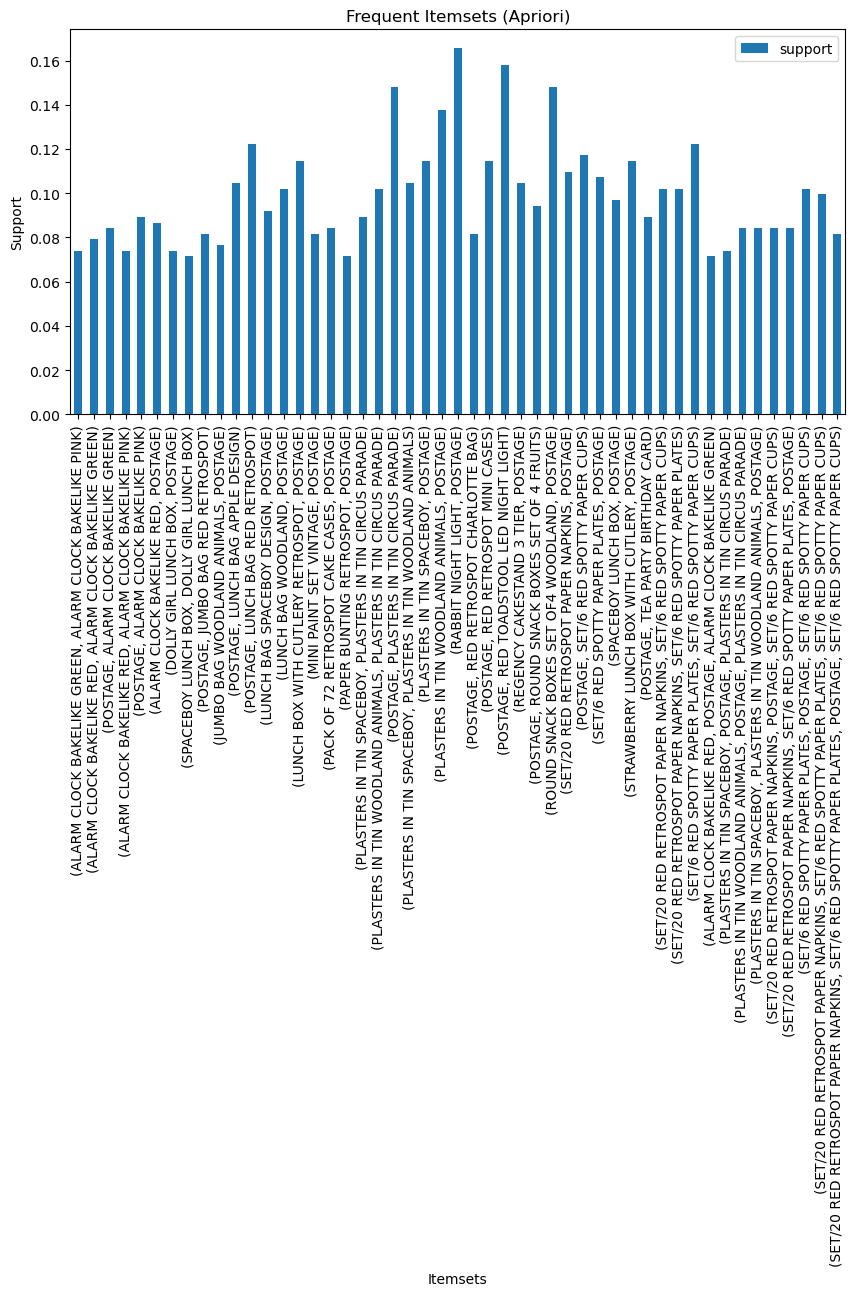

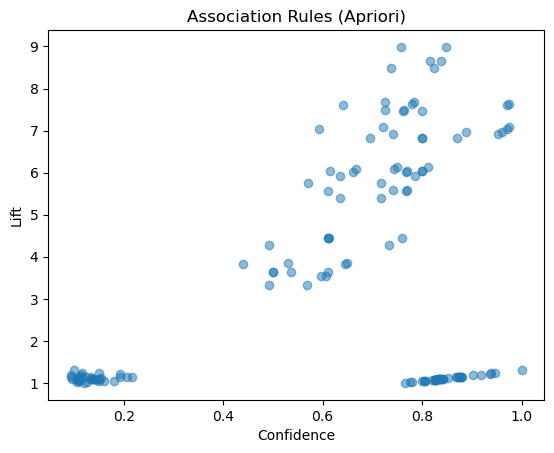

In [48]:
#visualization results for apriori
# Visualize frequent itemsets
# Visualization for Apriori results
import matplotlib.pyplot as plt
frequent_itemsets_apriori['length'] = frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x))
frequent_itemsets_apriori[frequent_itemsets_apriori['length'] > 1].plot(kind='bar', x='itemsets', y='support', figsize=(10, 5))
plt.title("Frequent Itemsets (Apriori)")
plt.ylabel("Support")
plt.xlabel("Itemsets")
plt.show()

plt.scatter(rules_apriori['confidence'], rules_apriori['lift'], alpha=0.5)
plt.title("Association Rules (Apriori)")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()



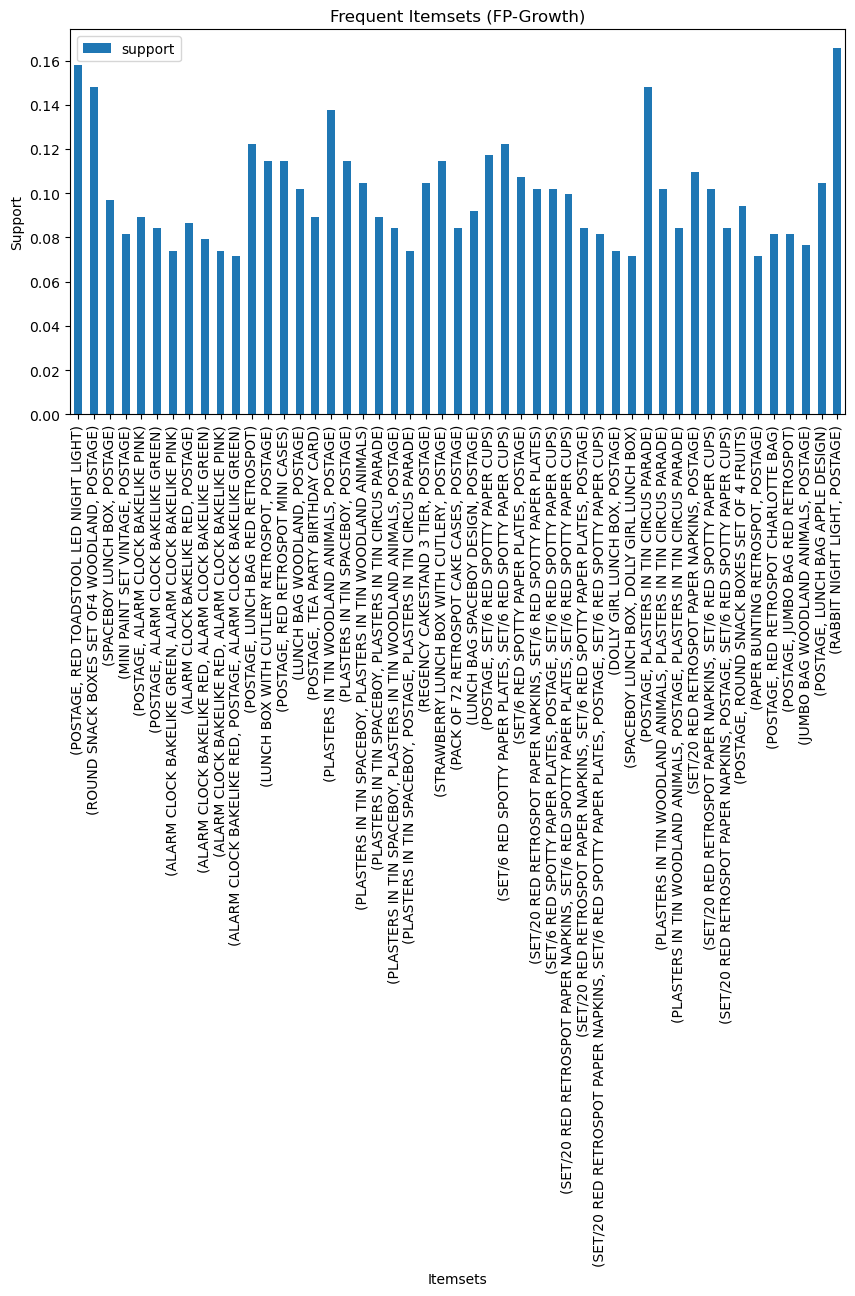

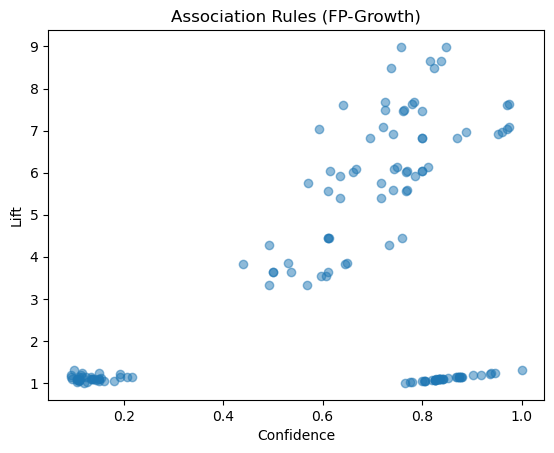

In [49]:
#visualization results for fp growth
# Visualization for FP-Growth results
import matplotlib.pyplot as plt
frequent_itemsets_fp['length'] = frequent_itemsets_fp['itemsets'].apply(lambda x: len(x))
frequent_itemsets_fp[frequent_itemsets_fp['length'] > 1].plot(kind='bar', x='itemsets', y='support', figsize=(10, 5))
plt.title("Frequent Itemsets (FP-Growth)")
plt.ylabel("Support")
plt.xlabel("Itemsets")
plt.show()

plt.scatter(rules_fp['confidence'], rules_fp['lift'], alpha=0.5)
plt.title("Association Rules (FP-Growth)")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()
